In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [498]:
df = pd.read_csv("4-Algerian_forest_fires_dataset.csv")

In [504]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [506]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [508]:
df.columns=df.columns.str.strip()

In [509]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [510]:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain  \
122                            NaN   NaN   NaN         NaN  NaN  NaN  NaN   
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN  NaN   
168                             14     7  2012          37   37   18  0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes  
122   NaN   NaN     NaN   NaN   NaN      NaN     NaN  
123   NaN   NaN     NaN   NaN   NaN      NaN     NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire        NaN

In [511]:
df.drop(122,inplace=True)

In [512]:
df

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI       Classes  
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[246 rows x 14 columns]

In [513]:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain  \
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN  NaN   
168                             14     7  2012          37   37   18  0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes  
123   NaN   NaN     NaN   NaN   NaN      NaN     NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire        NaN

In [514]:
df.loc[:123,"Region"]=0

In [515]:
df.loc[123:,"Region"]=1

In [516]:
df.head()
df.tail()

day month  year Temperature  RH  Ws Rain  FFMC  DMC    DC  ISI   BUI  FWI  \
242  26     9  2012          30  65  14    0  85.4   16  44.5  4.5  16.9  6.5   
243  27     9  2012          28  87  15  4.4  41.1  6.5     8  0.1   6.2    0   
244  28     9  2012          27  87  29  0.5  45.9  3.5   7.9  0.4   3.4  0.2   
245  29     9  2012          24  54  18  0.1  79.7  4.3  15.2  1.7   5.1  0.7   
246  30     9  2012          24  64  15  0.2  67.3  3.8  16.5  1.2   4.8  0.5   

          Classes  Region  
242       fire        1.0  
243   not fire        1.0  
244   not fire        1.0  
245   not fire        1.0  
246  not fire         1.0

In [517]:
df = df.dropna().reset_index(drop=True)

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [519]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [520]:
df["day"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [521]:
df[df["day"] == "day"]

day  month  year  Temperature   RH   Ws   Rain  FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI    Classes  Region  
122  FWI  Classes       1.0

In [522]:
df.drop(122, inplace=True)

In [523]:
df[["day", "month", "year", "Temperature", "RH", "Ws"]] = df[["day", "month", "year", "Temperature", "RH", "Ws"]].astype(int)

In [524]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int32(6), object(1)
memory usage: 24.7+ KB


In [526]:
df.describe()

day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606    4.154234   14.228421   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   71.850000    5.800000   12.350000    1.400000    6.000000   
50%      0.000000   83.300000   11.300000   33.100000    3.500000   12.400000   
75%      0.500000   88.300000   20.800000   69.100000    7.250000   22.650000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              FWI      Region  
count  243.000000  243.000000  
mean     7.035391    0.497942  
std      7.440568    0.501028  
min      0.000000    0.000000  
25%      0.700000    0.000000  
50%      4.200000    0.000000  
75%     11.450000    1.000000  
max     31.100000    1.000000

In [527]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [528]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [529]:
#fire ve not fireları birleştirdik
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [530]:
df_heatmap=df = df.drop(columns=["day", "month", "year"])


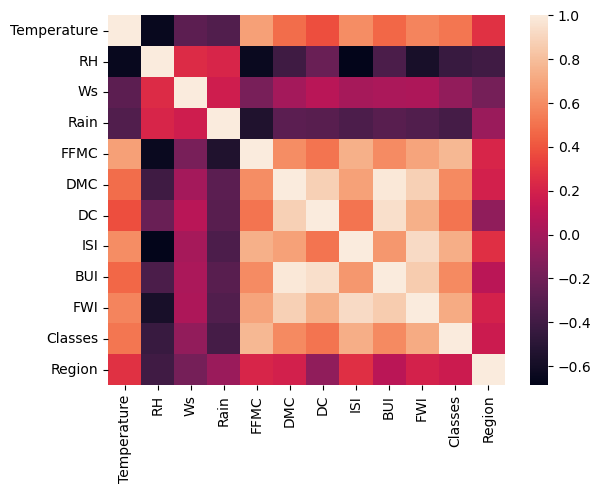

In [531]:
sns.heatmap(df_heatmap.corr())
plt.show()

In [532]:
df.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0     0.0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0     0.0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0     0.0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0     0.0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0     0.0

In [533]:
# dependent & independent features
X = df.drop("FWI", axis=1)
y = df["FWI"]

In [534]:
df

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5        0   
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4        0   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1        0   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0        0   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5        0   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...      ...   
239           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
240           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
241           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
242           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
243           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
239     1.0  
240     1.0  
241     1.0  
242     1.0  
243     1.0  

[243 rows x 12 columns]

In [536]:
from sklearn.model_selection import train_test_split

In [539]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [541]:
X_train.shape

(182, 11)

In [568]:
X_train.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.644824 -0.322405 -0.222809  0.600615  0.483815   
RH             -0.644824  1.000000  0.205669  0.171031 -0.643767 -0.395535   
Ws             -0.322405  0.205669  1.000000  0.152948 -0.135584  0.011874   
Rain           -0.222809  0.171031  0.152948  1.000000 -0.475600 -0.263007   
FFMC            0.600615 -0.643767 -0.135584 -0.475600  1.000000  0.592446   
DMC             0.483815 -0.395535  0.011874 -0.263007  0.592446  1.000000   
DC              0.362859 -0.204568  0.104577 -0.282983  0.483610  0.871387   
ISI             0.579809 -0.682107  0.021616 -0.325552  0.732549  0.658793   
BUI             0.452819 -0.337032  0.051452 -0.276457  0.577031  0.980646   
Classes         0.463959 -0.427947 -0.044791 -0.363013  0.770641  0.549624   
Region          0.229479 -0.368402 -0.181246  0.049735  0.158505  0.153781   

                   DC       ISI       BUI   Classes    Region  
Temperature  0.362859  0.579809  0.452819  0.463959  0.229479  
RH          -0.204568 -0.682107 -0.337032 -0.427947 -0.368402  
Ws           0.104577  0.021616  0.051452 -0.044791 -0.181246  
Rain        -0.282983 -0.325552 -0.276457 -0.363013  0.049735  
FFMC         0.483610  0.732549  0.577031  0.770641  0.158505  
DMC          0.871387  0.658793  0.980646  0.549624  0.153781  
DC           1.000000  0.467977  0.939248  0.468011 -0.120874  
ISI          0.467977  1.000000  0.617313  0.714801  0.241664  
BUI          0.939248  0.617313  1.000000  0.550431  0.044453  
Classes      0.468011  0.714801  0.550431  1.000000  0.136752  
Region      -0.120874  0.241664  0.044453  0.136752  1.000000

In [570]:
print(X_train.corr().iloc[0,2])

-0.32240526904978994


In [572]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

In [574]:
columns_dropping = correlation_for_dropping(X_train, 0.85)

In [576]:
columns_dropping

{'BUI', 'DC'}

In [578]:
X_train.drop(columns_dropping, axis= 1, inplace = True)
X_test.drop(columns_dropping, axis= 1, inplace = True)

In [580]:
X_train.shape

(182, 9)

In [582]:
X_test.shape

(61, 9)

In [584]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [586]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

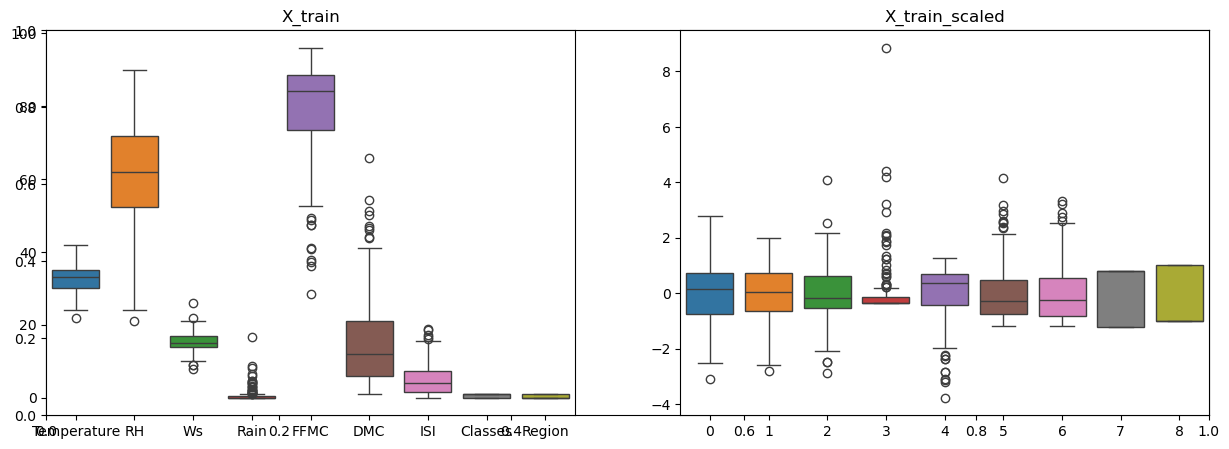

In [597]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

Mean Absolute Error:  0.7036011729575914
Mean Squared Error:  0.876416369860597
R2 Score:  0.9838729275348058


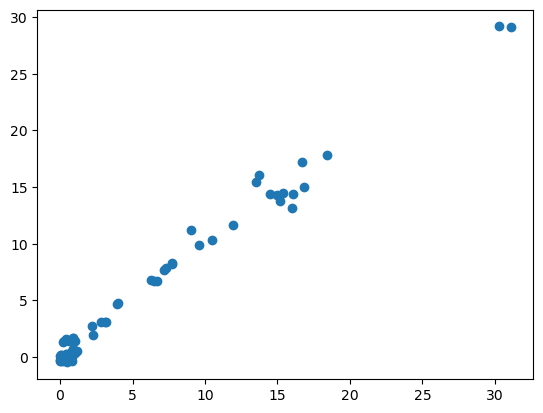

In [599]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.216272633800629
Mean Squared Error:  2.6029377368132187
R2 Score:  0.9521029422229386


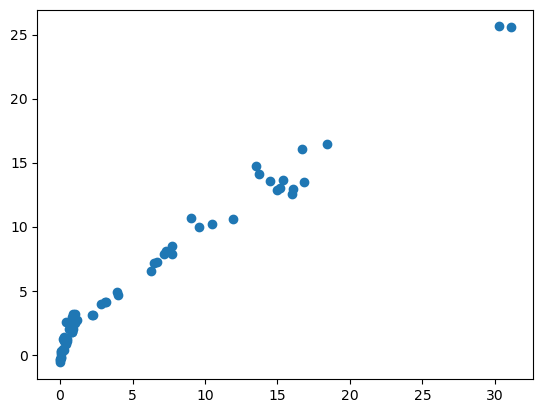

In [605]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  0.7093542448703316
Mean Squared Error:  0.886834846426308
R2 Score:  0.9836812155445575


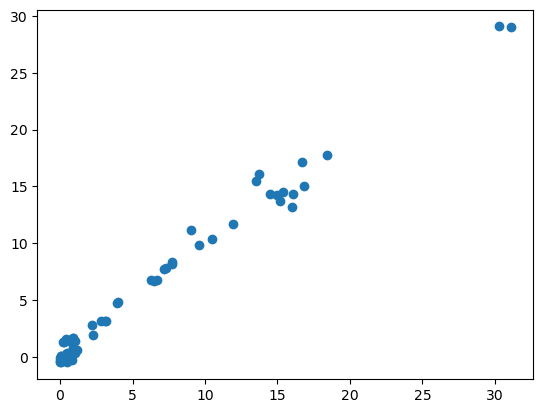

In [609]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.7493286471090155
Mean Squared Error:  5.569160502382823
R2 Score:  0.8975210207375393


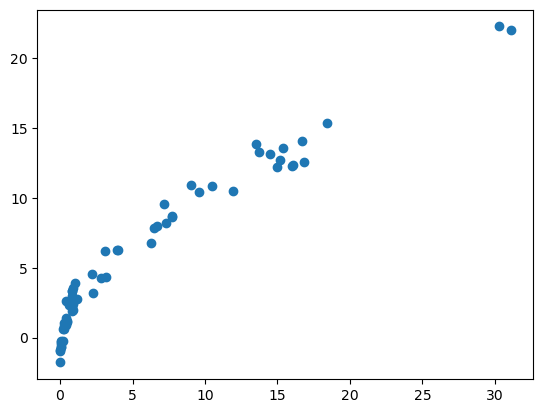

In [611]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
##Cross Validation

In [613]:
from sklearn.linear_model import LassoCV

Mean Absolute Error:  0.7222308156305418
Mean Squared Error:  0.8972011670293634
R2 Score:  0.9834904632842026


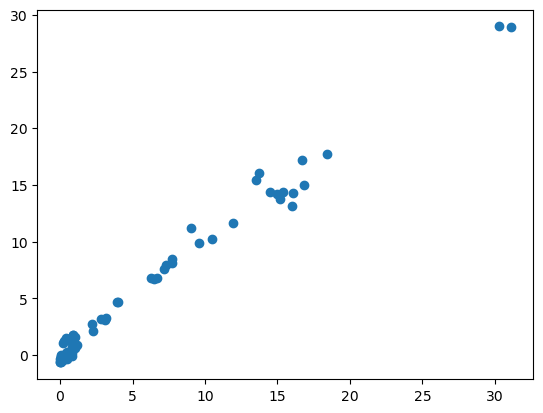

In [615]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [617]:
lassocv.alpha_

0.031548475118595085

In [619]:
lassocv.alphas_

array([6.79691292, 6.33882374, 5.91160823, 5.51318562, 5.14161537,
       4.7950877 , 4.47191484, 4.17052274, 3.88944347, 3.627308  ,
       3.38283958, 3.15484751, 2.94222135, 2.74392548, 2.55899408,
       2.38652645, 2.22568255, 2.075679  , 1.93578518, 1.80531974,
       1.68364723, 1.57017504, 1.4643505 , 1.36565818, 1.27361739,
       1.18777984, 1.10772745, 1.03307033, 0.96344485, 0.89851189,
       0.83795519, 0.78147982, 0.72881069, 0.67969129, 0.63388237,
       0.59116082, 0.55131856, 0.51416154, 0.47950877, 0.44719148,
       0.41705227, 0.38894435, 0.3627308 , 0.33828396, 0.31548475,
       0.29422213, 0.27439255, 0.25589941, 0.23865264, 0.22256826,
       0.2075679 , 0.19357852, 0.18053197, 0.16836472, 0.1570175 ,
       0.14643505, 0.13656582, 0.12736174, 0.11877798, 0.11077275,
       0.10330703, 0.09634448, 0.08985119, 0.08379552, 0.07814798,
       0.07288107, 0.06796913, 0.06338824, 0.05911608, 0.05513186,
       0.05141615, 0.04795088, 0.04471915, 0.04170523, 0.03889

In [621]:
from sklearn.linear_model import RidgeCV

Mean Absolute Error:  0.7093542448703316
Mean Squared Error:  0.886834846426308
R2 Score:  0.9836812155445575


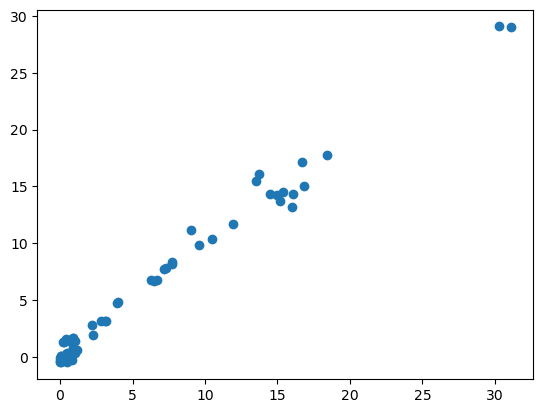

In [623]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

In [625]:
from sklearn.linear_model import ElasticNetCV

Mean Absolute Error:  0.7354284604918179
Mean Squared Error:  0.9249125778630379
R2 Score:  0.9829805413498388


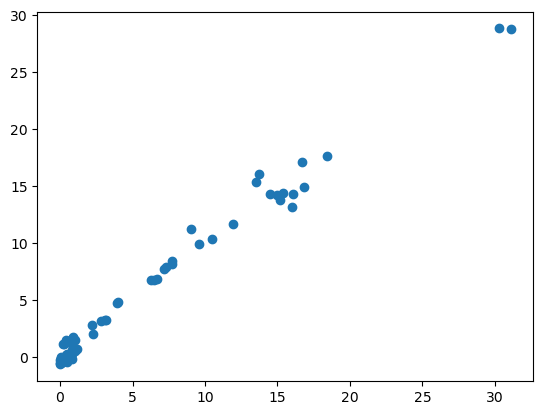

In [627]:
elastic_cv = ElasticNetCV(cv=5)
elastic_cv.fit(X_train_scaled, y_train)
y_pred = elastic_cv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()